# Project 1: KNN for Binary Classification and Learning Curve

**Biomedical Data for Diagnosis of Disk Hernia**

Each patient in the dataset is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB).

In [15]:
# Biomedical Data 
# Import libraries

# Import Pandas 
import pandas as pd 
pd.__version__

# Import Numpy
import numpy as np

# Import Print Functions
from __future__ import print_function

# Import Seaborn
import seaborn as sns

# Import Smatplotlib.pyplot
import matplotlib.pyplot as plt


# Set the print options
pd.options.display.float_format = '${:,.2f}'.format

# Column Data Labels:  
# Data Columns are pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis and Diagnosis (Normal/Abnormal)
col_Names=["incidence", "tilt", "angle", "slope", "radius", "grade", "diag"]

# Load data from Github - Public data, Raw
url = 'https://raw.githubusercontent.com/allen-ml/ML-Data//master/column_2C.dat'

# Read "space delimited" data "column_2C" For Normal/Abnormal classification
column_2C = pd.read_csv(url,sep='\s+',header=None,names=col_Names)

# Assign data to a dataframe
df1=pd.DataFrame(data=column_2C)

# Print Column Names
print(df1.columns)

#Print the first 5 lines of the dataframe
print(df1.head())

# Get the number of the rows
print(df1.shape[0])

# Add a column to the data indicating the index number based  on the maximum number of rows. 
df_dummy=pd.DataFrame(range(df1.shape[0]),columns=["data_index"])
print(df_dummy.head)
df1["data_index"]=df_dummy
print(df1.head())

# make a copy of the "diag" column and encode the categorical values AB=1, NO=0
df1["diag_cat"]=df1["diag"]
df1["diag_cat"].replace(to_replace=['AB','NO'], value=[1, 0], inplace=True)
print(df1.head())




Index(['incidence', 'tilt', 'angle', 'slope', 'radius', 'grade', 'diag'], dtype='object')
   incidence   tilt  angle  slope  radius  grade diag
0     $63.03 $22.55 $39.61 $40.48  $98.67 $-0.25   AB
1     $39.06 $10.06 $25.02 $29.00 $114.41  $4.56   AB
2     $68.83 $22.22 $50.09 $46.61 $105.99 $-3.53   AB
3     $69.30 $24.65 $44.31 $44.64 $101.87 $11.21   AB
4     $49.71  $9.65 $28.32 $40.06 $108.17  $7.92   AB
310
<bound method NDFrame.head of      data_index
0             0
1             1
2             2
3             3
4             4
..          ...
305         305
306         306
307         307
308         308
309         309

[310 rows x 1 columns]>
   incidence   tilt  angle  slope  radius  grade diag  data_index
0     $63.03 $22.55 $39.61 $40.48  $98.67 $-0.25   AB           0
1     $39.06 $10.06 $25.02 $29.00 $114.41  $4.56   AB           1
2     $68.83 $22.22 $50.09 $46.61 $105.99 $-3.53   AB           2
3     $69.30 $24.65 $44.31 $44.64 $101.87 $11.21   AB           3
4    

**i.** **Scatterplots** of the independent variables in the dataset.

**ii.** **Boxplots** for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

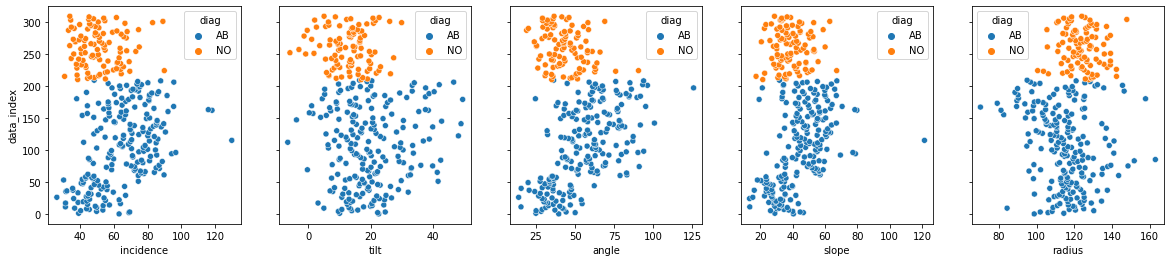

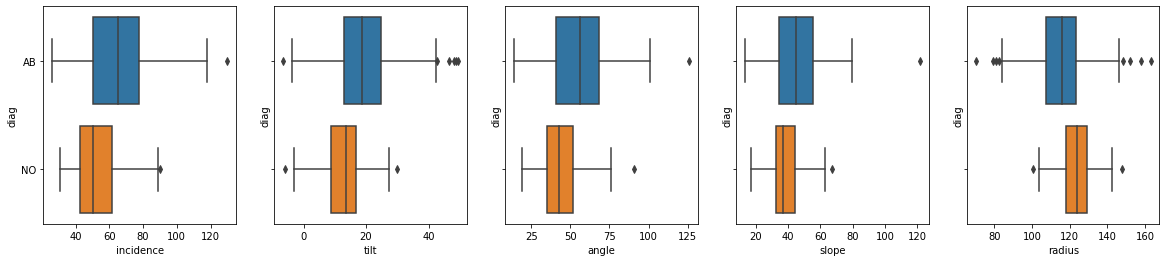

In [16]:
# Scatter Plots of the data points. 
plot_data=df1
f, axes = plt.subplots(1,5, sharey=True, figsize=(20, 4))
sns.scatterplot(y="data_index",x="incidence", hue="diag", data=plot_data,ax=axes[0])
sns.scatterplot(y="data_index",x="tilt", hue="diag", data=plot_data,ax=axes[1])
sns.scatterplot(y="data_index",x="angle", hue="diag", data=plot_data,ax=axes[2])
sns.scatterplot(y="data_index",x="slope", hue="diag", data=plot_data,ax=axes[3])
sns.scatterplot(y="data_index",x="radius", hue="diag", data=plot_data,ax=axes[4])

# Boxplots of the data points.
f, axes = plt.subplots(1,5, sharey=True, figsize=(20, 4))
sns.boxplot(y="diag", x="incidence", data=plot_data, ax=axes[0])
sns.boxplot(y="diag", x="tilt", data=plot_data, ax=axes[1])
sns.boxplot(y="diag", x="angle", data=plot_data, ax=axes[2])
sns.boxplot(y="diag", x="slope", data=plot_data, ax=axes[3])
sns.boxplot(y="diag", x="radius", data=plot_data, ax=axes[4])


**iii.** The first 70 rows of Class 0 and the first 140 rows of Class 1 are selected the **training set** and the rest of the data as the **test set**. 

In [17]:
# Fine the datapoint with Category = 0, i.e. Normal
bool_df=df1["diag_cat"]==0

# Part one of Training data set is the first 70 data points of diagnosed patients with Normal
training_data_0=pd.DataFrame(df1[bool_df][:70])
print('Training data 0 is: \n',training_data_0.shape,'\n',training_data_0)

# The remianing Normal points belong to test data point. 
test_data_0=pd.DataFrame(df1[bool_df][70:len(df1[bool_df])])
test_data_0.shape
print('Test data 0 is: \n',test_data_0.shape,'\n',test_data_0)

# Part two of Training data set if the first 140 data points of the diagnosed patients with Abnormal
bool_df=df1["diag_cat"]==1
training_data_1=pd.DataFrame(df1[bool_df][:140])
print('Training data 1 is: \n',training_data_1.shape,'\n',training_data_1)

# The remianing Normal points belong to test data point. 
test_data_1=pd.DataFrame(df1[bool_df][140:len(df1[bool_df])])
print('length of the boolean \n',len(df1[bool_df]))
print('Test data 1 is: \n',test_data_1.shape,'\n',test_data_1)

# Combine the two parts of data to form training and testing data points.
training_data = pd.DataFrame(pd.concat([training_data_0,training_data_1]))
test_data = pd.DataFrame(pd.concat([test_data_0,test_data_1]))
print('Training Data Set: \n',training_data.shape,'\n',training_data)
print('Test Data Set: \n',test_data.shape,'\n',test_data)
X_train=training_data[["incidence","tilt","angle","slope","radius","grade"]]
Y_train=training_data[["diag_cat"]]
X_test=test_data[["incidence","tilt","angle","slope","radius","grade"]]
Y_test=test_data[["diag_cat"]]

Training data 0 is: 
 (70, 9) 
      incidence   tilt  angle  slope  radius  grade diag  data_index  diag_cat
210     $38.51 $16.96 $35.11 $21.54 $127.63  $7.99   NO         210         0
211     $54.92 $18.97 $51.60 $35.95 $125.85  $2.00   NO         211         0
212     $44.36  $8.95 $46.90 $35.42 $129.22  $4.99   NO         212         0
213     $48.32 $17.45 $48.00 $30.87 $128.98 $-0.91   NO         213         0
214     $45.70 $10.66 $42.58 $35.04 $130.18 $-3.39   NO         214         0
..         ...    ...    ...    ...     ...    ...  ...         ...       ...
275     $67.29 $16.72 $51.00 $50.57 $137.59  $4.96   NO         275         0
276     $51.33 $13.63 $33.26 $37.69 $131.31  $1.79   NO         276         0
277     $65.76 $13.21 $44.00 $52.55 $129.39 $-1.98   NO         277         0
278     $40.41 $-1.33 $30.98 $41.74 $119.34 $-6.17   NO         278         0
279     $48.80 $18.02 $52.00 $30.78 $139.15 $10.44   NO         279         0

[70 rows x 9 columns]
Test data

#Classification using KNN on Vertebral Column Data Set 

**i.** K-nearest neighbors with Euclidean metric. 



![picture](https://drive.google.com/uc?export=view&id=1MFI3cd555Fbu6m3-SwFvo8YLHseJkb_4)

![picture](https://drive.google.com/uc?export=view&id=1Z-AMDS1G6S7fGIi2HtpECYc48sLyrHIF)

Maximum accuracy is achieved at  0.94
[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.72, 0.73, 0.76, 0.77, 0.8, 0.78, 0.85, 0.8, 0.84, 0.84, 0.86, 0.82, 0.86, 0.84, 0.85, 0.84, 0.83, 0.84, 0.86, 0.87, 0.88, 0.87, 0.88, 0.87, 0.88, 0.88, 0.88, 0.88, 0.89, 0.89, 0.88, 0.88, 0.9, 0.89, 0.89, 0.89, 0.9, 0.89, 0.9, 0.89, 0.91, 0.88, 0.9, 0.88, 0.94, 0.87]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False]
[0.94]
Maximum Scores are happening at Locations:  [68]
4
The corresponding location and K in the K range is as following: 
 Locations , K Value

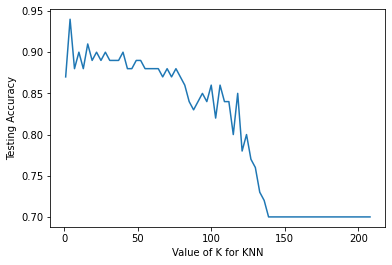

In [18]:
# import the KNeigborsClassifier Class from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Import metrics model to check the accuracy 
from sklearn import metrics

k_range=range(208,1-3,-3)
#for n in k:
#    print(n)

scores = {}
scores_list = []

for k in k_range:

  knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean',weights='uniform')
  knn.fit(X_train,Y_train.values.ravel())
  Y_pred=knn.predict(X_test)
  scores[k]=metrics.accuracy_score(Y_test,Y_pred)
  scores_list.append(metrics.accuracy_score(Y_test,Y_pred))

import matplotlib.pyplot as plt

#Plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

print('Maximum accuracy is achieved at ',max(scores_list))
print(scores_list)

# Create a boolean list that locates where the score is maximum
bool_scores_list= scores_list == max(scores_list)
print(bool_scores_list)

# Print the values that match Boolean in the list compressed
from itertools import compress
print(list(compress(scores_list, bool_scores_list)))
# Find the locations of where the maximum is happening
max_locations=np.where(bool_scores_list)[0]
print('Maximum Scores are happening at Locations: ',max_locations)
print(k_range[68])
df_k=pd.DataFrame(k_range)
print('The corresponding location and K in the K range is as following: \n Locations , K Value \n',df_k.iloc[max_locations,0])


**Score Definitions**


![picture](https://drive.google.com/uc?export=view&id=1hgmRBBSHY4ddWoQcCSiIsOpTvEQcXTvo)


**ii.** All the data in the test database are tested with k nearest neighbors. Decisions are made by majority polling. Train and test errors are plotted in terms of k for k ∈{208,205,...,7,4,1,} (in reverse order). The most suitable k is found. The confusion matrix, true positive rate, true negative rate, precision, and F1-score are calculated for the optimum value. 

In [19]:
#Calcualte the confusion matrics for the best k
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean',weights='uniform')
knn.fit(X_train,Y_train.values.ravel())
Y_pred=knn.predict(X_test)
tn, fp, fn, tp=confusion_matrix(Y_test,Y_pred).ravel()
print('tn = ',tn,'fp = ', fp, 'fn = ', fn, 'tp = ', tp)
print('The confusion matrix is: \n',confusion_matrix(Y_test,Y_pred))
#print(Y_test,Y_pred)
#print(np.sum(cm,axis=1))
# True Positive Rate (TPR) Sensitivity or Recall
Sensitivity=tp/(tp+fn)
print('Sensitivity or Recall = ',Sensitivity)
# True Negative Rate (TNR) or Specifity 
Specifity = tn/(tn+fp)
# Precision
Precision = tp/(tp+fp)
print('Precision = ',Precision)
# F1 Score
F1_Score=2*tp/(2*tp+fp+fn)
print('F1_Score = ',F1_Score)
print(np.arange(0,99,5))

tn =  25 fp =  5 fn =  1 tp =  69
The confusion matrix is: 
 [[25  5]
 [ 1 69]]
Sensitivity or Recall =  0.9857142857142858
Precision =  0.9324324324324325
F1_Score =  0.9583333333333334
[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


Since the computation time depends on the size of the training set, one may only use a subset of the training set. The best test error rate is plotted, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}. For each N, the training set is selected by choosing the first [N/3] rows of Class 0 and the first N −[N/3] rows of Class 1 in the training set. 

Moreover, for each N, the optimal k is selected from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196} for the **learning cruve**.

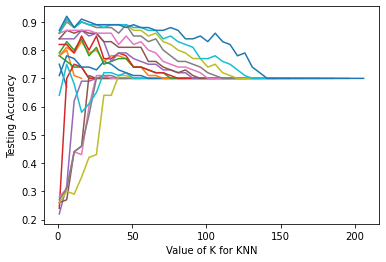

N used = 
 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]
k used = 
 [1, 6, 1, 11, 26, 21, 26, 31, 41, 6, 6, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6]
fitness at each stage = 
 [0.75, 0.8, 0.78, 0.75, 0.7, 0.71, 0.71, 0.71, 0.71, 0.75, 0.78, 0.83, 0.84, 0.85, 0.87, 0.87, 0.87, 0.9, 0.91, 0.91, 0.92]


Text(0, 0.5, 'Optimal K for the subset')

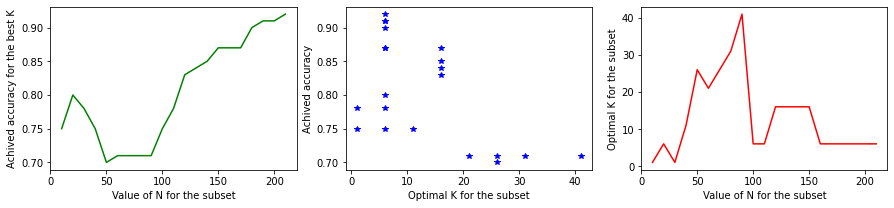

In [20]:
import math as mt
used_N = []
optimal_k = []
optimal_error = []

for N in np.arange(10,210+1,10):
    #print(N)
    subset_0=mt.floor(N/3)
    #print(subset_0)
    training_data_0_selected=pd.DataFrame(training_data_0[:subset_0])
    #print('Training data 0 selected is: \n',training_data_0_selected.shape,'\n',training_data_0_selected)
    training_data_1_selected=pd.DataFrame(training_data_1[:N-subset_0])
    #print('Training data 1 selected is: \n',training_data_1_selected.shape,'\n',training_data_1_selected)
    training_data_selected = pd.DataFrame(pd.concat([training_data_0_selected,training_data_1_selected]))
        
    X_train=training_data_selected[["incidence","tilt","angle","slope","radius","grade"]]
    Y_train=training_data_selected[["diag_cat"]]
    k_range=np.arange(1,N+1,5)
    scores = {}
    scores_list = []
    for k in k_range:
        # import the KNeigborsClassifier Class from sklearn
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean',weights='uniform')
        knn.fit(X_train,Y_train.values.ravel())
        Y_pred=knn.predict(X_test)
        #scores[k]=metrics.accuracy_score(Y_test,Y_pred)
        scores_list.append(metrics.accuracy_score(Y_test,Y_pred))

    import matplotlib.pyplot as plt
    #Plot the relationship between K and the testing accuracy
    plt.plot(k_range,scores_list)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Testing Accuracy')
    #print('Maximum accuracy is achieved at ',max(scores_list))
    #print(scores_list)
    # Create a boolean list that locates where the score is maximum
    bool_scores_list= scores_list == max(scores_list)
    #print(bool_scores_list)
    # Print the values that match Boolean in the list compressed
    from itertools import compress
    #print(list(compress(scores_list, bool_scores_list)))
    # Find the locations of where the maximum is happening
    max_locations=np.where(bool_scores_list)[0]
    #print('Maximum Scores are happening at Locations: ',max_locations)
    #df_max_loc=pd.DataFrame(max_locations)
    #print(df_max_loc)
    #print(k_range[df_max_loc(0,0)])
    df_k=pd.DataFrame(k_range)
    #print('The corresponding location and K in the K range is as following: \n Locations , K Value \n',df_k.iloc[max_locations,0])
    #print(df_k.iloc[max_locations,0])
    temp_k=pd.DataFrame(df_k.iloc[max_locations,0])
    temp_k.reset_index(drop=True)
    #print('optimal k values',temp_k.iloc[0,0])
    #print('max locations:',max_locations[0,1])
    optimal_k.append(temp_k.iloc[0,0])
    optimal_error.append(max(scores_list))
    used_N.append(N)

plt.show()

fig = plt.figure(figsize=(15, 3))
graph1=plt.subplot(131)

print('N used = \n',used_N)
print('k used = \n',optimal_k)
print('fitness at each stage = \n',optimal_error)
graph1.plot(used_N,optimal_error,color='green')
plt.xlabel('Value of N for the subset')
plt.ylabel('Achived accuracy for the best K')
#plt.show()

graph2=plt.subplot(132)
graph2.plot(optimal_k,optimal_error,'*',color='blue')
plt.xlabel('Optimal K for the subset')
plt.ylabel('Achived accuracy')
#graph2.show()

graph3=plt.subplot(133)
graph3.plot(used_N,optimal_k,color='red')
plt.xlabel('Value of N for the subset')
plt.ylabel('Optimal K for the subset')
#plt.show()
